## **EDA:** Análisis exploratorio de datos

#### Importar librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Cargar data:

In [2]:
# Temperatura
df_maxim = pd.read_csv('data_temperatura/maximo_temperaturas_maximas_santiago.csv')
df_minim = pd.read_csv('data_temperatura/media_temperaturas_minimas_santiago.csv')
df_media = pd.read_csv('data_temperatura/media_temperaturas_maximas_santiago.csv')

# Humedad, precipitación, y presión
df_humed = pd.read_csv('data_temperatura/humedad_mensual_santiago.csv')
df_preci = pd.read_csv('data_temperatura/precipitaciones_mensuales_santiago.csv') # Precipitación
df_presi = pd.read_csv('data_temperatura/presion_mensual_santiago.csv') # Presión

lista_dataframes = [df_maxim, df_minim, df_media, df_humed, df_preci, df_presi]
for df in lista_dataframes:
    df.drop_duplicates(inplace=True)

#### Mostrar y checkear data:

In [3]:
# Temperatura
display(df_maxim.head(1))
display(df_minim.head(1))
display(df_media.head(1))
# Humedad, precipitación, y presión
display(df_humed.head(1))
display(df_preci.head(1))

,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1920,34.0,33.0,32.7,28.8,28.8,22.8,21.7,23.5,30.0,28.0,32.2,32.4


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1920,12.174194,11.182759,10.041935,6.893333,5.832258,3.84,1.629032,3.703226,5.706667,6.419355,9.583333,11.374194


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,1920,29.474194,29.32069,28.683871,23.333333,19.090323,14.19,14.880645,17.722581,19.733333,21.151613,25.46,27.451613


,Año,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1970,51.025,52.675862,57.009375,62.074194,74.796875,80.883871,83.184375,76.9375,71.267742,66.04375,54.487097,51.978125


,Años,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Anual
0,2025,0.0,0.0,5.4,0.5,61.3,71.2,23.3,46.0,15.3,3.6,4.3,NaN,226.6


In [4]:
# Temperatura
display(df_maxim.tail(1))
display(df_minim.tail(1))
display(df_media.tail(1))
# Humedad y precipitación
display(df_humed.tail(1))
display(df_preci.tail(1))

,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
164,2024,37.3,36.1,32.7,32.1,22.5,21.5,25.6,25.8,28.0,34.3,32.2,35.6


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
104,2024,13.770968,14.493103,11.922581,9.353333,3.567742,5.886667,2.067742,4.151613,6.183333,9.383871,10.063333,11.496774


,Año,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
164,2024,31.832258,31.834483,30.174194,23.383333,15.935484,15.176667,17.393548,16.516129,21.55,25.222581,27.32,29.93871


,Año,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
54,2024,51.759375,53.523333,52.35,60.487097,78.471875,84.293548,74.671875,75.35625,64.467742,65.378125,52.803226,50.490625


,Años,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic,Anual
111,1914,0.0,0.0,0.0,6.4,21.7,245.1,125.0,72.7,103.5,58.5,70.6,0.0,703.5


In [5]:
print(f'Tipos de datos en df_maxim \n{df_maxim.dtypes}\nCantidad de NaN en df_maxim \n{df_maxim.isna().sum()}\n')
print(f'Tipos de datos en df_media \n{df_media.dtypes}\nCantidad de NaN en df_media \n{df_media.isna().sum()}\n')
print(f'Tipos de datos en df_minim \n{df_minim.dtypes}\nCantidad de NaN en df_minim \n{df_minim.isna().sum()}\n\n')

print(f'Tipos de datos en df_humed \n{df_humed.dtypes}\nCantidad de NaN en df_humed \n{df_humed.isna().sum()}\n')
print(f'Tipos de datos en df_preci \n{df_preci.dtypes}\nCantidad de NaN en df_preci \n{df_preci.isna().sum()}\n')
print(f'Tipos de datos en df_presi \n{df_presi.dtypes}\nCantidad de NaN en df_presi \n{df_presi.isna().sum()}')


Tipos de datos en df_maxim 
Año             int64
Enero         float64
Febrero       float64
Marzo         float64
Abril         float64
Mayo          float64
Junio         float64
Julio         float64
Agosto        float64
Septiembre    float64
Octubre       float64
Noviembre     float64
Diciembre     float64
dtype: object
Cantidad de NaN en df_maxim 
Año           0
Enero         0
Febrero       0
Marzo         0
Abril         0
Mayo          0
Junio         0
Julio         0
Agosto        0
Septiembre    0
Octubre       0
Noviembre     0
Diciembre     0
dtype: int64

Tipos de datos en df_media 
Año             int64
Enero         float64
Febrero       float64
Marzo         float64
Abril         float64
Mayo          float64
Junio         float64
Julio         float64
Agosto        float64
Septiembre    float64
Octubre       float64
Noviembre     float64
Diciembre     float64
dtype: object
Cantidad de NaN en df_media 
Año           0
Enero         0
Febrero       0
Marzo         0


En general, no parece haber mucho malo con los datos, hay NaN pero no parecen que vayan a impedir mucho de lo que planeamos hacer con los datos.

#### Añadir elementos a DataFrames antes de graficarlos.

In [6]:
## Solo me importa el verano y los meses cerca del verano, así que hago copias de los Dataframes con solo esos meses.

# Temperatura
nombre_cols_1 = ['Año', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']
df_media_v = df_media[nombre_cols_1].copy()
df_maxim_v = df_maxim[nombre_cols_1].copy()
df_minim_v = df_minim[nombre_cols_1].copy()

nombre_meses_1 = ['Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo']
df_media_v['Media_verano'] = df_media_v[nombre_meses_1].mean(axis=1)
df_maxim_v['Max'] = df_maxim_v[nombre_meses_1].max(axis=1)
df_minim_v['Min'] = df_minim_v[nombre_meses_1].mean(axis=1)


# Humedad, precipitación, presión
nombre_cols_2 = ['Año', 'Nov', 'Dic', 'Ene', 'Feb', 'Mar']
df_humed_v = df_humed[nombre_cols_2].copy()
df_preci_v = df_preci[['Años', 'Nov', 'Dic', 'Ene', 'Feb', 'Mar']].copy() # Tiene "Años" en vez de "Año".
df_presi_v = df_presi[nombre_cols_2].copy()

nombre_meses_2 = ['Nov', 'Dic', 'Ene', 'Feb', 'Mar']
df_humed_v['Humedad_media'] = df_humed_v[nombre_meses_2].mean(axis=1)
df_preci_v['Media_precipitación'] = df_preci_v[nombre_meses_2].mean(axis=1)
df_presi_v['Media_presión'] = df_presi_v[nombre_meses_2].mean(axis=1)

In [7]:
## Unión de DataFrames!
# Temperatura
df_short_media_v = df_media_v[['Año', 'Media_verano']].copy()
df_short_maxim_v = df_maxim_v[['Año', 'Max']].copy()
df_short_minim_v = df_minim_v[['Año', 'Min']].copy()

df_short_media_v = df_short_media_v.rename(columns={'Media_verano' : 'Media_temperatura'})
df_short_maxim_v = df_short_maxim_v.rename(columns={'Max' : 'Max_temperatura'})
df_short_minim_v = df_short_minim_v.rename(columns={'Min' : 'Min_temperatura'})

df_merge_1 = pd.merge(df_short_media_v, df_short_maxim_v, on='Año', how='inner')
df_merge_2 = pd.merge(df_merge_1, df_short_minim_v, on='Año', how='inner')

display(df_merge_2.head(1))

# Humedad, precipitación, presión
df_short_humed_v = df_humed_v[['Año', 'Humedad_media']].copy()
df_short_preci_v = df_preci_v[['Años', 'Media_precipitación']].copy()
df_short_presi_v = df_presi_v[['Año', 'Media_presión']].copy()

df_short_humed_v = df_short_humed_v.rename(columns={'Humedad_media' : 'Media_humedad'})
df_short_preci_v = df_short_preci_v.rename(columns={'Años' : 'Año'})

df_merge_3 = pd.merge(df_short_humed_v, df_short_preci_v, on='Año', how='inner')
df_merge_4 = pd.merge(df_merge_3, df_short_presi_v, on='Año', how='inner')

display(df_merge_4.head(1))

## Finalizar el merge! :D
df_combinado = pd.merge(df_merge_4, df_merge_2, on='Año', how='inner')

display(df_combinado.head(5))

,Año,Media_temperatura,Max_temperatura,Min_temperatura
0,1920,28.078073,34.0,10.871283


,Año,Media_humedad,Media_precipitación,Media_presión
0,1970,53.435092,0.0,953.997444


,Año,Media_humedad,Media_precipitación,Media_presión,Media_temperatura,Max_temperatura,Min_temperatura
0,1970,53.435092,0.00,953.997444,28.185866,34.8,11.279797
1,1971,56.627683,0.74,953.770872,27.793316,34.2,10.725329
2,1972,54.700169,3.04,953.554386,28.366167,34.4,11.718688
3,1973,60.260827,0.04,954.221370,27.852448,34.3,10.967781
4,1974,59.046087,3.54,954.040553,27.091475,32.4,10.866816


### **Gráficos:**

* **Temperatura por año en el periodo Noviembre-Marzo**

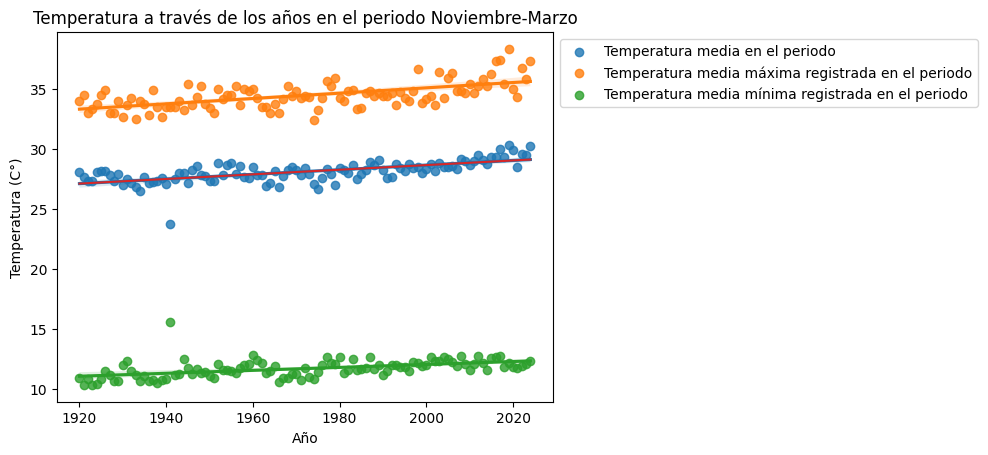

In [8]:
# Predicción de valores de df_media_v, redundante por regplot.
X = df_media_v['Año'].values.reshape(-1, 1)
y = df_media_v['Media_verano'].values.reshape(-1, 1)

modelo = LinearRegression()
modelo.fit(X, y)

y_predict = modelo.predict(X)

# Cosas para plotear la info de los DataFrames de temperatura.
sns.regplot(data=df_media_v, x='Año', y='Media_verano', label='Temperatura media en el periodo')
sns.regplot(data=df_maxim_v, x='Año', y='Max', label='Temperatura media máxima registrada en el periodo')
sns.regplot(data=df_minim_v, x='Año', y='Min', label='Temperatura media mínima registrada en el periodo')

plt.title('Temperatura a través de los años en el periodo Noviembre-Marzo')
plt.ylabel('Temperatura (C°)')
plt.legend(bbox_to_anchor=(1, 1))

plt.plot(df_media_v['Año'], y_predict)

* **Histograma de temperaturas por mes individual (arriba) y histograma de temperaturas mensuales en total (abajo)**

Text(0.5, 0, 'Temperatura (C°)')

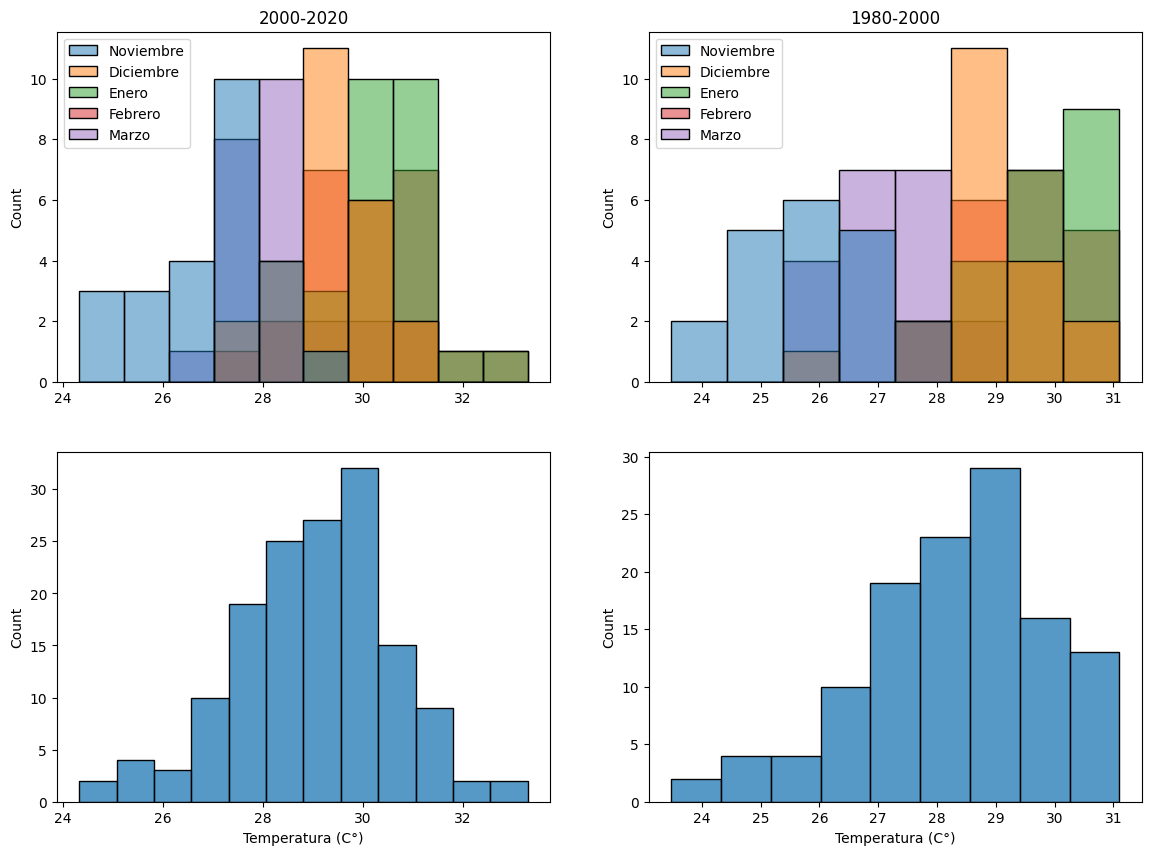

In [9]:
# Esto es para poder tener multiples gráficos separados.
fig, ax = plt.subplots(2, 2, figsize=(14,10))

# Hace un DataFrame de los datos a partir del año 2000 y uno para los datos entre 1980-2000.
df_media_2000_v = df_media_v[df_media['Año'] >= 2000].copy()
df_media_2000_v = df_media_2000_v.reset_index(drop=True)

df_media_1980_v = df_media_v[( (df_media['Año'] < 2000) & (df_media['Año'] >= 1980) )].copy()
df_media_1980_v = df_media_1980_v.reset_index(drop=True)

# Derrite los dataframes para tener filas de los años con cada mes individualmente.
df_2000_v_melted = pd.melt(df_media_2000_v, id_vars='Año')
df_1980_v_melted = pd.melt(df_media_1980_v, id_vars='Año')

# Plotea los DataFrames en gráficos separados.
sns.histplot(df_media_2000_v[nombre_meses_1], ax=ax[0, 0])
sns.histplot(df_2000_v_melted['value'], ax=ax[1, 0])

sns.histplot(df_media_1980_v[nombre_meses_1], ax=ax[0, 1])
sns.histplot(df_1980_v_melted['value'], ax=ax[1, 1])

ax[0, 0].set_title('2000-2020')
ax[1, 0].set_xlabel('Temperatura (C°)')
ax[0, 1].set_title('1980-2000')
ax[1, 1].set_xlabel('Temperatura (C°)')

* **Heatmap de correlación entre ciertos parametros**

<Axes: >

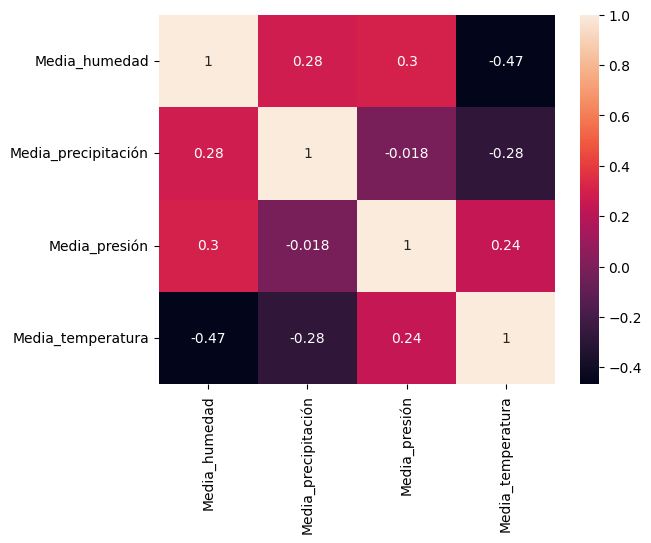

In [10]:
# Ver corr de ciertos parametros del DataFrame combinado.
corr_combinado = df_combinado[['Media_humedad', 'Media_precipitación', 'Media_presión', 'Media_temperatura']].corr()

# Plotear el heatmap! :D
sns.heatmap(corr_combinado, annot=True)